# **Bank Churn Dataset**
This dataset is a binary classification dataset, it was was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. The goal is to predict where a customer continues with their accoutn or closes it. The tagert varible been Exited with 1 = yes and 0 = No


Project Link: https://www.kaggle.com/competitions/playground-series-s4e1/overview

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Loading the training data
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
### Checking size 
df.shape

(165034, 14)

In [5]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
## Displaying the firt few row and basic info about the dataset 
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


(None,
    id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
 0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
 1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
 2   2    15694510           Hsueh          678    France   Male  40.0      10   
 3   3    15741417             Kao          581    France   Male  34.0       2   
 4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   
 
      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
 0       0.00              2        1.0             0.0        181449.97   
 1       0.00              2        1.0             1.0         49503.50   
 2       0.00              2        1.0             0.0        184866.69   
 3  148882.54              1        1.0             1.0         84560.88   
 4       0.00              2        1.0             1.0         15068.83   
 
    Exited  
 0       0  
 1       0  
 2

The datasets cosist of 165034 entries and 14 columns, with mix of integers, floats, and object data types

**Here's a summary of my understanding of the Data so far**
* **ID: Integer** This looks like an identifier for each  entry
* **CustomerID: Integer** This seems to an identifer for the customers
* **Surname: Object(String)** This is the names of the customer can be categorize as an identifier also, since it also just telling us who the customer's are.
* **CreditScore: Int** a credit-score is a threee-digit number that indicates your ability to repay debt, will need to check for outliers and see if it needs to be scaled or not. **(Important)**
* **Geography: Object**  This seem to be the location the customers live **(Important)**
* **Gender: Object** the customer's gender identity, there could be a relationship here it going to be encoded. **(Important)**
* **Age: Float** the age of our customer could be important to why customers are exiting the bank,might be outliers need to be handle and scaled. **(Important)**
* **Tenure: Int** this is the length of time that will be taken by borrower to repay a loan along w/ the interest, High interest and lower tenure could be a reason for customers leaving, so Checking for outliers.**(Important)**
* **Balance: Float** This is the amount the customers currently have in their account, Banks shut down accounts with no money in them, this could lead to customer leaving & the empty balance could be an indication that they have left in the first place. Also checking for outliers **(Important)**
* **NumOFProducts: Int** This is the number of bank products the customers uses, i.e saving account/credit card.
* **HasCrCard: Float** Whether customer has a credit card or not, (0=no, 1=yes)
* **ISActiveMember: Float** Whether the customer is an active member or not, (0=no, 1=yes)
* **EstimatedSalary:Float** The estimated salary of the customer, Checking for outliers and scaling the numbers. **(Important)**
* **Exited: Int** Whether the customer has left the bank or is still a customer, inorder word churned. This is my target variable

In [8]:
### Checking for uniques variables in my catgorical data
df['Geography'].unique(), df['Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Male', 'Female'], dtype=object))

In [9]:
## Checking  for duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicate: \n", duplicates)

Number of Duplicate: 
 0


In [10]:
### Checking for invalid entries 
invalid_entries = df[df.select_dtypes(include=['number'])< 0].count()
print("Invalid Entries: \n" , invalid_entries)

Invalid Entries: 
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [11]:
### Dropping the Entry Id, the Customer Id, Surname since they are just identifiers 
df_0 = df.drop(["id" , "CustomerId", "Surname"], axis=1)
df_0.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Initial Data Visualization

**Histogram**

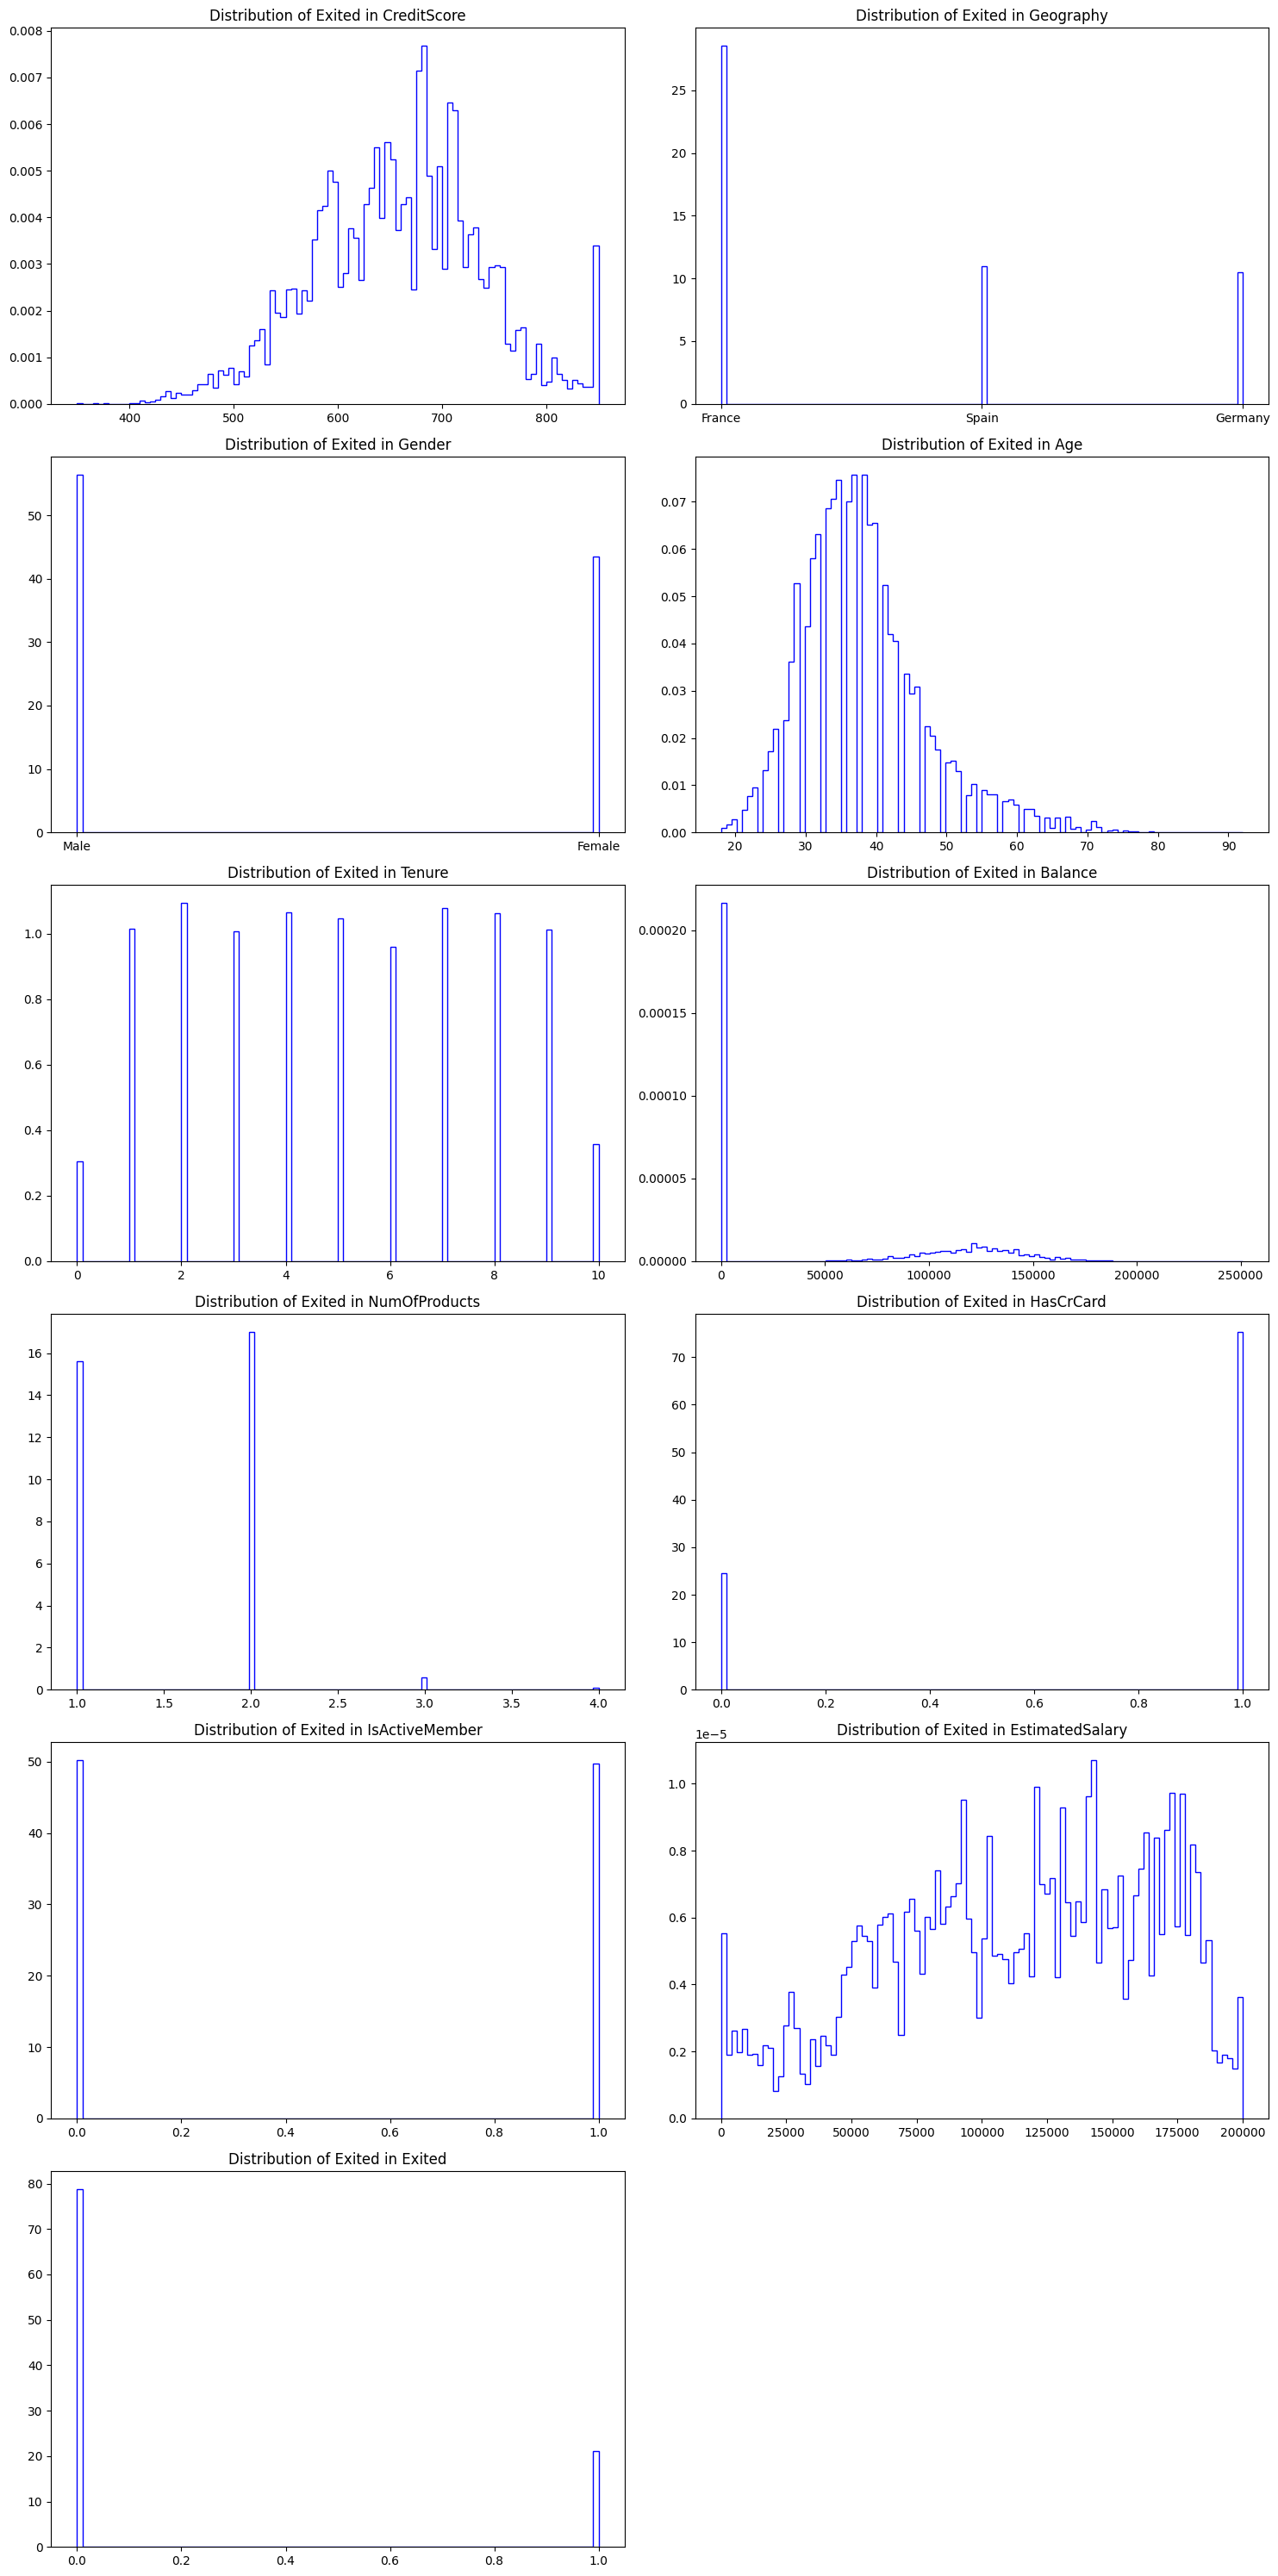

In [12]:
num_cols = len(df_0.columns)  # Number of columns in df_0
num_rows = (num_cols + 1) // 2  # Calculating the number of rows needed for subplots

##Creating the subplot
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

## Plotting the histogram
for i, col in enumerate(df_0.columns):
    row_index = i // 2
    col_index = i % 2
    
    axes[row_index, col_index].hist(np.array(df_0[col]), bins=100, histtype="step", 
                                     color="blue", density=1, stacked=True)
    axes[row_index, col_index].set_title(f"Distribution of Exited in {col}")

# Hiding empty subplot just in case
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()

**Distribution of the target variable**

In [13]:
###Splitting the target variable into its binary classification
tar_no = df_0[df_0["Exited"] == 0]
tar_yes = df_0[df_0["Exited"] == 1]

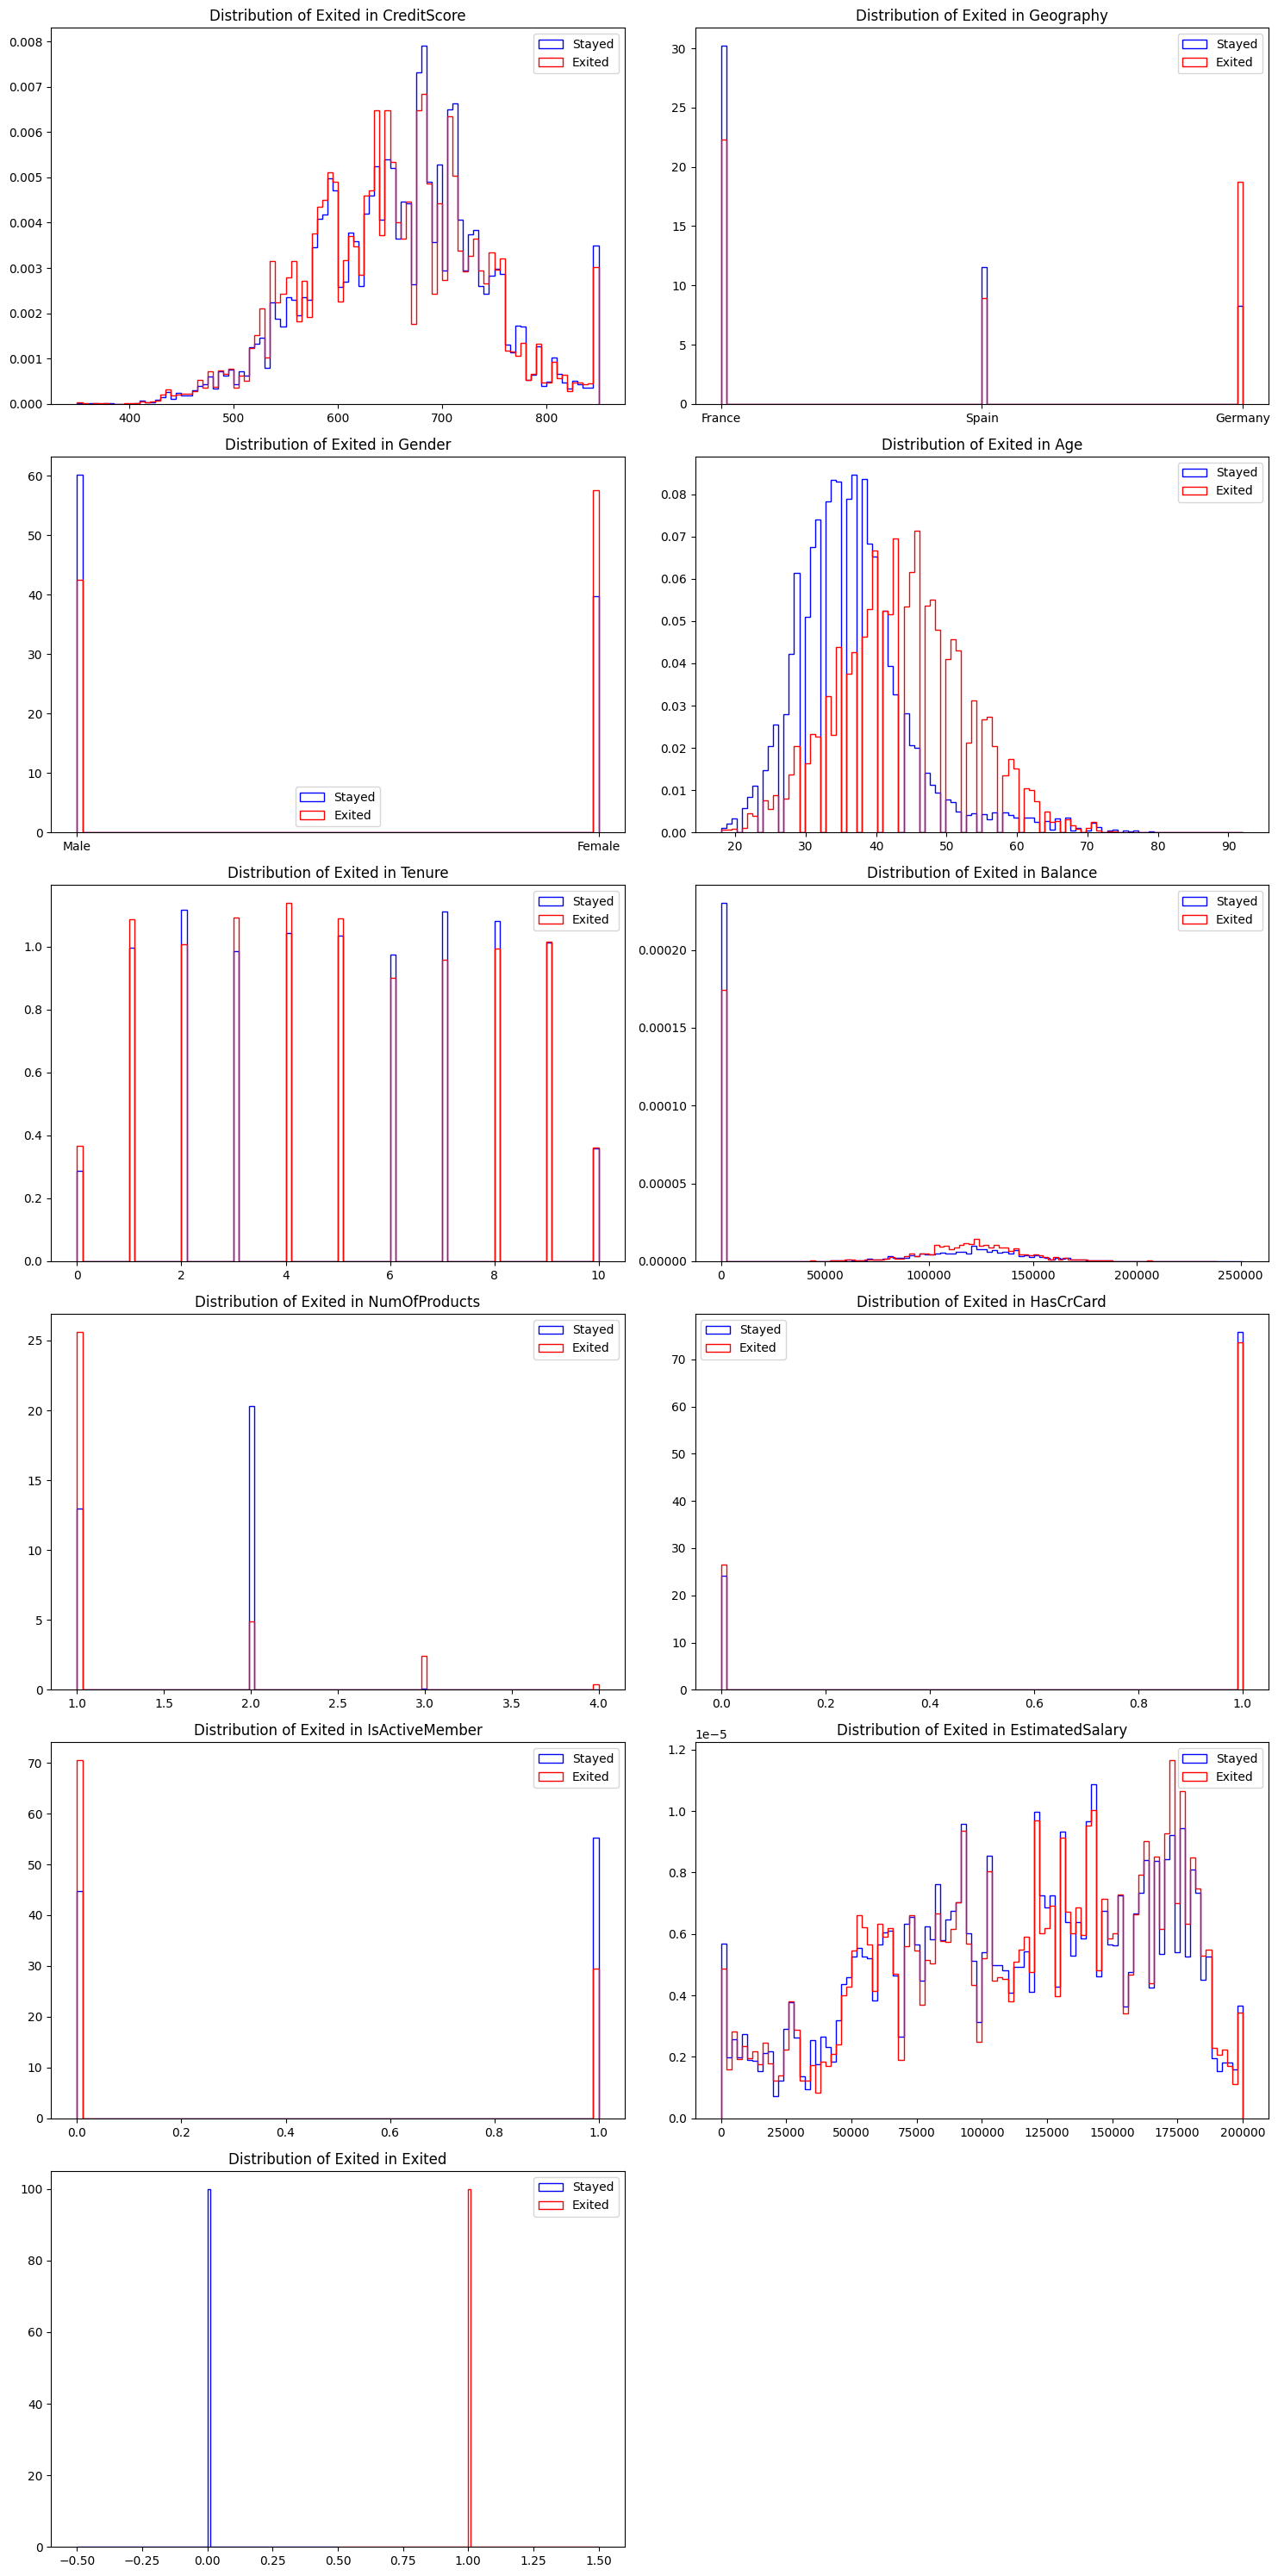

In [14]:
num_cols = len(df_0.columns)  # Number of columns in df_0
num_rows = (num_cols + 1) // 2  # Calculating the number of rows needed for subplots

##Creating the subplot
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

## Plotting the histogram
for i, col in enumerate(df_0.columns):
    row_index = i // 2
    col_index = i % 2
    
    axes[row_index, col_index].hist(np.array(tar_no[col]), bins=100, histtype="step", 
                                     color="blue", density=1, label="Stayed", stacked=True)
    axes[row_index, col_index].hist(np.array(tar_yes[col]), bins=100, histtype="step", 
                                     color="red", density=1, label="Exited", stacked=True)
    
    axes[row_index, col_index].set_title(f"Distribution of Exited in {col}")
    axes[row_index, col_index].legend()

# Hiding empty subplot just in case
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()

##### Corrlation Matrix just to observe the influence each numerical variables have on each other and on the target variable 

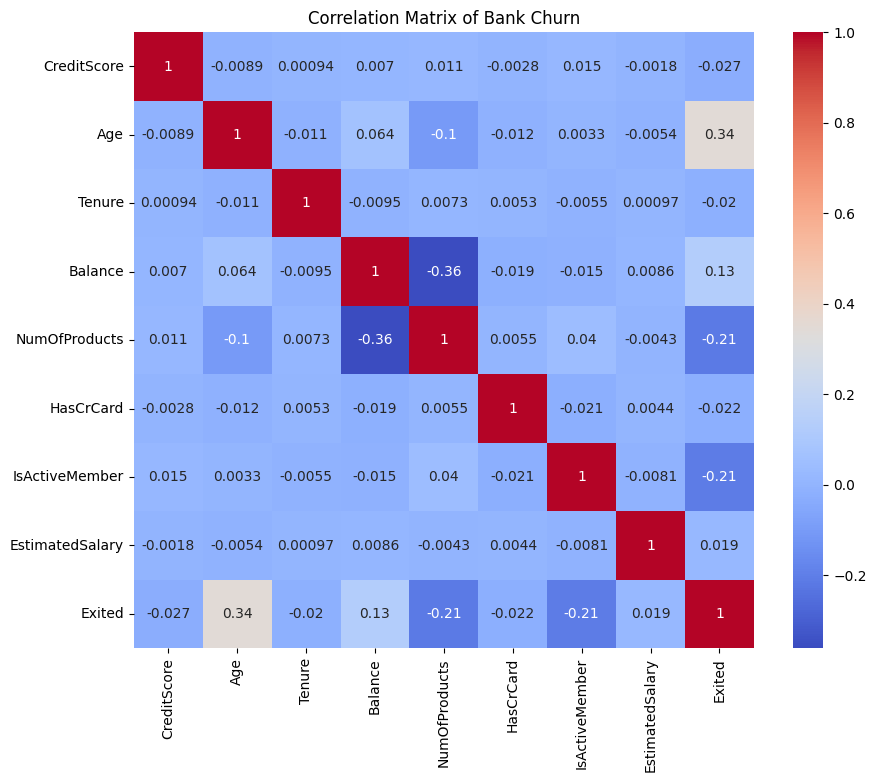

In [15]:
# Correlation Matrix
num_col = df_0.select_dtypes(include=['number']).columns
correlation_matrix = df_0[num_col].corr()

#Heatmap of the matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Bank Churn")
plt.show()

It seems the relationship between our numerical variable is colder than hot, the variable with the highest correlation with the target variable(Exited) is Age and it's more in the no relation camp than a positive one, another variable with an inkling of relationship with Exited is Balance and that it's also in the same both as Age. 

**Handling outliers**


In [16]:
##Checking for outliers 
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df_num=df_0[num_cols]
for col in df_num.columns:
   q1=df_num[col].quantile(0.25)
   q3=df_num[col].quantile(0.75)
   IQR=q3-q1
   outliers=df_num[((df_num[col]<(q1-1.5*IQR)) | (df_num[col]>(q3+1.5*IQR)))]
   print(f'{col} outlier count: {outliers.value_counts().sum()}')

CreditScore outlier count: 253
Age outlier count: 6394
Tenure outlier count: 0
Balance outlier count: 0
NumOfProducts outlier count: 475
EstimatedSalary outlier count: 0


Looking at the columns with outliers and their histogram, Credit score, Age, and number of products looks like no handling is needed honestly. 

**Feature Engineering**
* The feature I'm going to categorize is age:
   * Categorization:
     * young_adult: 18-24
     * Adult: 25-39
     * Middle_age: 40-59
     * Elder: 60 and up

In [17]:
##Function to categorize age
def age_cat(value):
    if value < 25:
        return 'young_adult'
    elif value >= 25 and value<40:
        return "Adult"
    elif value >= 40 and value<60:
        return "Middle_Age"
    else:
        return "Elder"

In [18]:
### applying that function to the df
df_0["Age_cat"] = df_0["Age"].apply(age_cat)
df_0.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_cat
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,Adult
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,Adult
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,Middle_Age
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,Adult
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Adult


**Encoding & Scaling the feature**

In [19]:
df_0.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Age_cat'],
      dtype='object')

In [20]:
### OneHot Endcoding
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output= False).set_output(transform='pandas')

In [21]:
ohetransform = ohe.fit_transform(df_0[[ 'Geography', 'Gender', 'Age_cat']])
ohetransform

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_cat_Adult,Age_cat_Elder,Age_cat_Middle_Age,Age_cat_young_adult
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
165029,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
165030,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
165031,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
165032,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


Scaling

In [22]:
# Select numerical features
num_features = df_0.select_dtypes(include=['number']).drop(columns = ["Exited"])

target = df_0["Exited"]

# Initialize MinMaxScaler
scaler = RobustScaler()

# Fit and transform the numerical features
scaled_data = scaler.fit_transform(num_features)

# Create a DataFrame from the scaled data with original column names
scaled_df = pd.DataFrame(scaled_data, columns=num_features.columns)

In [23]:
scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.079646,-0.4,-0.50,0.000000,0.0,0.0,0.0,0.788698
1,-0.283186,-0.4,-1.00,0.000000,0.0,0.0,1.0,-0.850085
2,0.168142,0.3,1.25,0.000000,0.0,0.0,0.0,0.831134
3,-0.690265,-0.3,-0.75,1.241313,-1.0,0.0,1.0,-0.414670
4,0.504425,-0.4,0.00,0.000000,0.0,0.0,1.0,-1.277766


In [24]:
df_1 = pd.concat([scaled_df, ohetransform, target], axis=1)
df_1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_cat_Adult,Age_cat_Elder,Age_cat_Middle_Age,Age_cat_young_adult,Exited
0,0.079646,-0.4,-0.50,0.000000,0.0,0.0,0.0,0.788698,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,-0.283186,-0.4,-1.00,0.000000,0.0,0.0,1.0,-0.850085,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0.168142,0.3,1.25,0.000000,0.0,0.0,0.0,0.831134,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,-0.690265,-0.3,-0.75,1.241313,-1.0,0.0,1.0,-0.414670,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.504425,-0.4,0.00,0.000000,0.0,0.0,1.0,-1.277766,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0


# Model Selection

[0 1] [130113  34921]


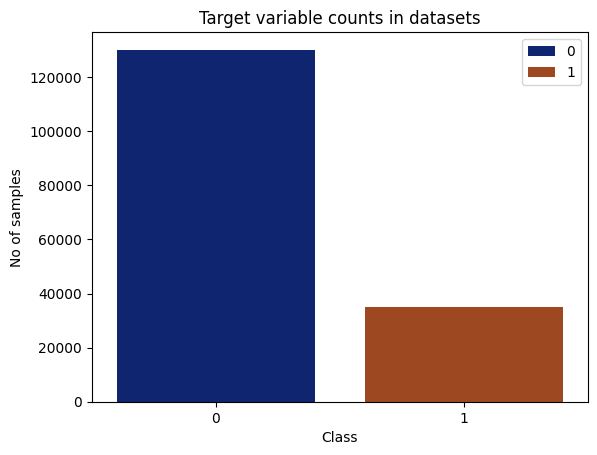

In [25]:
### Checking to see if target varible is balance
(unique, counts) = np.unique(df_1['Exited'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts, hue=unique, palette='dark', legend=True)
plt.xlabel("Class")
plt.ylabel("No of samples")
plt.xticks()
plt.title("Target variable counts in datasets")
plt.show()
plt.close()

In [26]:
## Balancing my datasets
## Separating the bigger and smaller class
maj_class = df_1[df_1['Exited']==0]
min_class = df_1[df_1['Exited']==1]

##Setting count of the smaller class
min_class_count = len(min_class)

## Undersampling bigger class to match smaller class
under_maj_class = maj_class.sample(n=min_class_count, random_state= 42)

## Combining smaller class w/ the undersampled bigger class
balanced_df = pd.concat([under_maj_class, min_class])

In [27]:
class_count = balanced_df['Exited'].value_counts()
class_count

Exited
0    34921
1    34921
Name: count, dtype: int64

In [28]:
balanced_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Age_cat_Adult', 'Age_cat_Elder', 'Age_cat_Middle_Age',
       'Age_cat_young_adult', 'Exited'],
      dtype='object')

In [29]:
### Splitting the datasets
X = balanced_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Age_cat_Adult', 'Age_cat_Elder', 'Age_cat_Middle_Age',
       'Age_cat_young_adult']]
y = balanced_df[['Exited']]

**Logistic Regression**

/home/maryamajibola_elias/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7525950318562531
Precision: 0.7580669144981412
Recall: 0.7359607333622059
F1-score: 0.7468502783474948


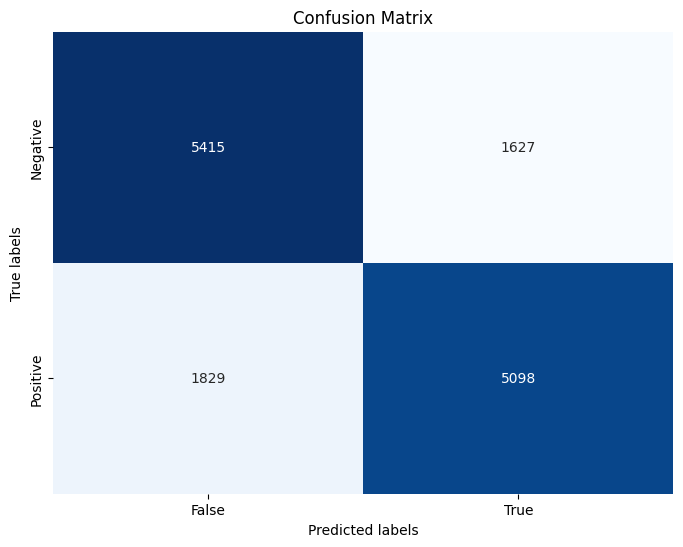

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Initializing and training the machine learning model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the target variable for the test set
y_pred = model.predict(X_test)

# Computing the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing out the metrics
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Negative", "Positive"]
predicted_labels = ["False", "True"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=predicted_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

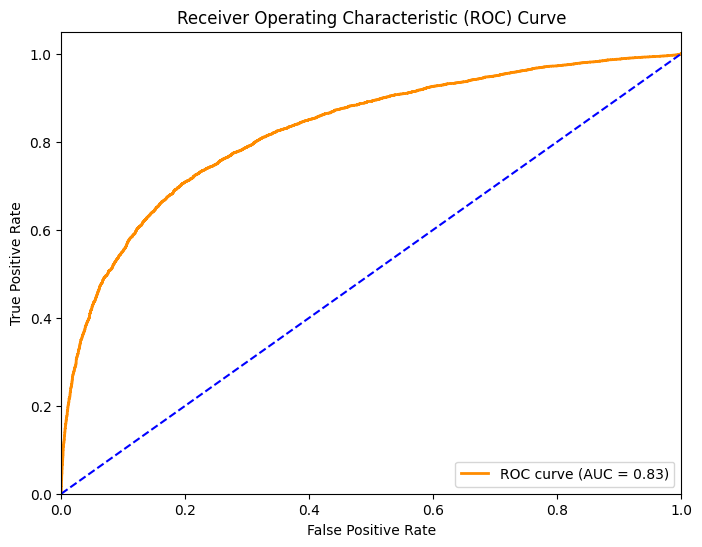

In [31]:
from sklearn.metrics import roc_curve, auc
# Computing  predicted probabilities for positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Computing the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the  ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**KNN Model**

Accuracy: 0.7779368601904216
Precision: 0.7864105504587156
Recall: 0.7728937728937729
F1-score: 0.779593576808299


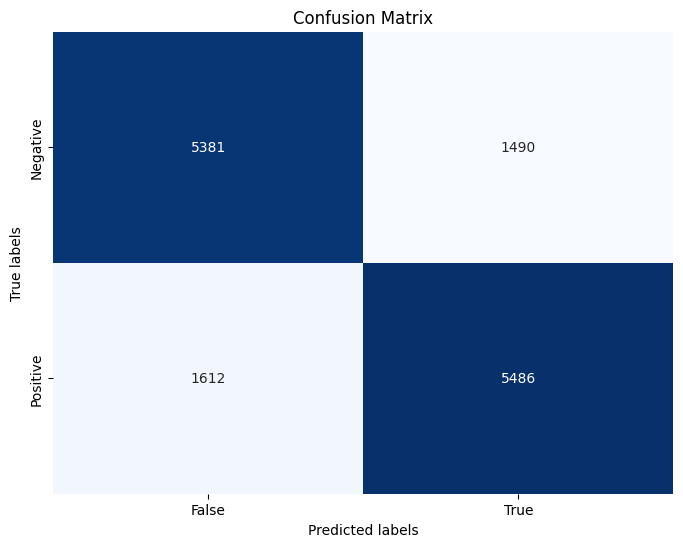

In [32]:
from sklearn.neighbors import KNeighborsClassifier
### Splitting the dataset
X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.20)
### Converting y_trian and y_test from columns to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
### Training the df
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train, y_train)
### Testing the model
y_pred = classifier.predict(X_test)
### Computing the accuracy, precison, recall, & f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
## Printing out the metrics
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:" ,f1)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = ["Negative", "Positive"]
predicted_labels = ["False", "True"]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=predicted_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

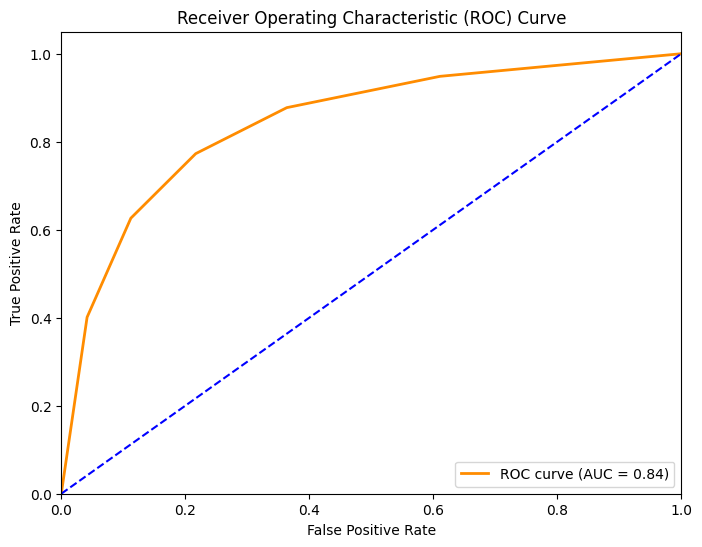

In [33]:
# Computing  predicted probabilities for positive class (class 1)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Computing the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the  ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Testing the Model**

In [34]:
## Loading the new dataset
test_df = pd.read_csv("test.csv")
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [35]:
test_df.shape

(110023, 13)

In [36]:
test_df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [37]:
### Checking for missing values
missing_data = test_df.isna().sum()
print("Missing values:", missing_data)

Missing values: id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [38]:
###Checking for duplicate
duplicates = test_df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [39]:
### Checking for invalid entries 
invalid_entries = test_df[test_df.select_dtypes(include=['number'])< 0].count()
print("Invalid Entries: \n" , invalid_entries)

Invalid Entries: 
 id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [78]:
## Extracting the test id
test_id = test_df['id'].values
### Dropping same columns as the train data
test_df0 = test_df.drop(["id" , "CustomerId", "Surname"], axis=1)
test_df0.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


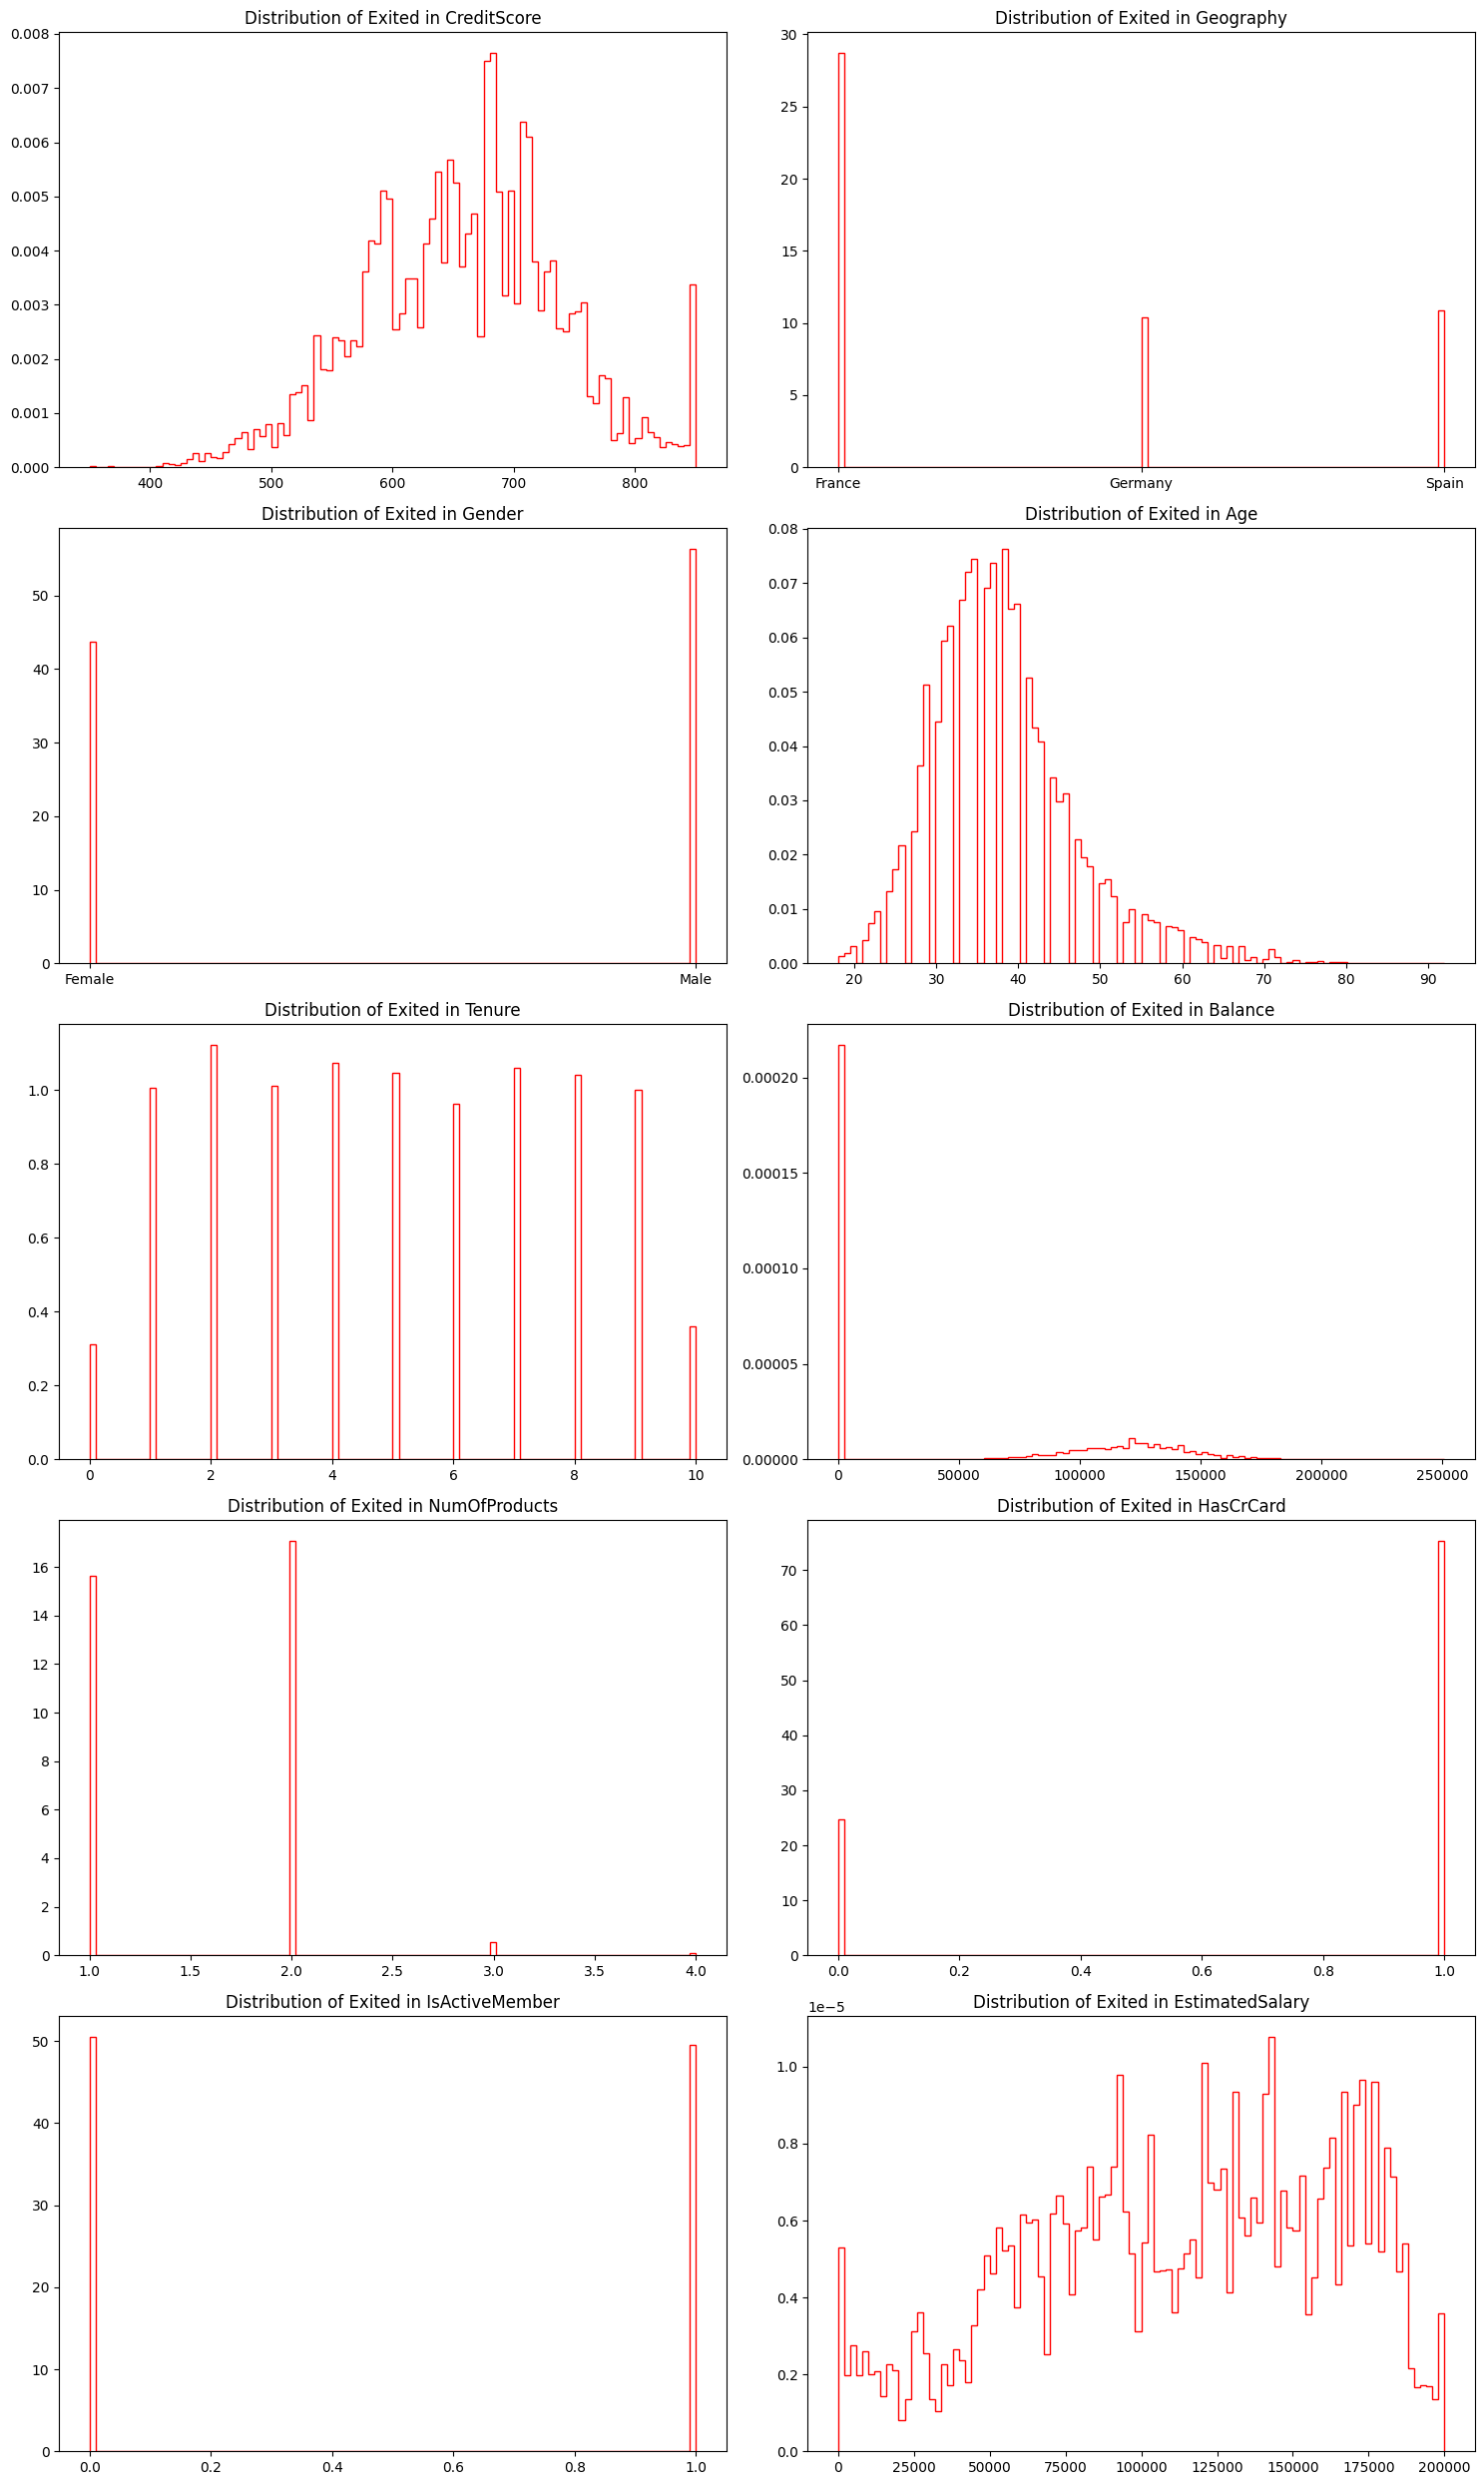

In [79]:
num_cols = len(test_df0.columns)  # Number of columns in test_df0
num_rows = (num_cols + 1) // 2  # Calculating the number of rows needed for subplots

##Creating the subplot
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

## Plotting the histogram
for i, col in enumerate(test_df0.columns):
    row_index = i // 2
    col_index = i % 2
    
    axes[row_index, col_index].hist(np.array(test_df0[col]), bins=100, histtype="step", 
                                     color="red", density=1, stacked=True)
    axes[row_index, col_index].set_title(f"Distribution of Exited in {col}")

# Hiding empty subplot just in case
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.show()

In [80]:
### Checking for outliers
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df_num=test_df0[num_cols]
for col in df_num.columns:
   q1=df_num[col].quantile(0.25)
   q3=df_num[col].quantile(0.75)
   IQR=q3-q1
   outliers=df_num[((df_num[col]<(q1-1.5*IQR)) | (df_num[col]>(q3+1.5*IQR)))]
   print(f'{col} outlier count: {outliers.value_counts().sum()}')

CreditScore outlier count: 176
Age outlier count: 4246
Tenure outlier count: 0
Balance outlier count: 0
NumOfProducts outlier count: 304
EstimatedSalary outlier count: 0


In [81]:
### Feature Engineering the Age columns
def age_cat(value):
    if value < 25:
        return 'young_adult'
    elif value >= 25 and value<40:
        return "Adult"
    elif value >= 40 and value<60:
        return "Middle_Age"
    else:
        return "Elder"

### applying that function to the df
test_df0["Age_cat"] = test_df0["Age"].apply(age_cat)
test_df0.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_cat
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,young_adult
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,Middle_Age
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,Adult
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,Adult
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,Adult


In [82]:
### OneHot Endcoding
from sklearn.preprocessing import RobustScaler, OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output= False).set_output(transform='pandas')

In [83]:
ohetransform = ohe.fit_transform(test_df0[[ 'Geography', 'Gender', 'Age_cat']])
ohetransform

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_cat_Adult,Age_cat_Elder,Age_cat_Middle_Age,Age_cat_young_adult
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
110018,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
110019,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
110020,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
110021,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Scaling

In [84]:
# Select numerical features
num_features = test_df0.select_dtypes(include=['number'])

# Initialize MinMaxScaler
scaler = RobustScaler()

# Fit and transform the numerical features
scal_data = scaler.fit_transform(num_features)

# Create a DataFrame from the scaled data with original column names
scal_testdf = pd.DataFrame(scal_data, columns=num_features.columns)

In [85]:
scal_testdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.654867,-1.4,-0.75,0.000000,0.0,-1.0,1.0,0.538022
1,0.203540,0.9,-0.75,0.000000,-1.0,0.0,0.0,-0.564689
2,-0.035398,-0.3,0.50,0.000000,0.0,0.0,0.0,0.262496
3,0.185841,-0.1,0.75,0.000000,-1.0,0.0,0.0,-0.048642
4,0.814159,0.1,1.25,1.009306,-1.0,0.0,0.0,0.269341


In [86]:
#### Checking whether that the scaled df and the encoded df are equal
scal_testdf.shape

(110023, 8)

In [87]:
ohetransform.shape

(110023, 9)

In [88]:
test_df1 = pd.concat([scal_testdf, ohetransform], axis=1)
test_df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_cat_Adult,Age_cat_Elder,Age_cat_Middle_Age,Age_cat_young_adult
0,-0.654867,-1.4,-0.75,0.000000,0.0,-1.0,1.0,0.538022,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.203540,0.9,-0.75,0.000000,-1.0,0.0,0.0,-0.564689,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.035398,-0.3,0.50,0.000000,0.0,0.0,0.0,0.262496,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.185841,-0.1,0.75,0.000000,-1.0,0.0,0.0,-0.048642,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.814159,0.1,1.25,1.009306,-1.0,0.0,0.0,0.269341,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [89]:
test_df1.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_cat_Adult,Age_cat_Elder,Age_cat_Middle_Age,Age_cat_young_adult
110018,-0.796460,-0.8,0.50,0.966326,-1.0,0.0,1.0,0.377291,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
110019,-0.752212,-0.1,-0.25,1.481806,-1.0,0.0,1.0,-0.943379,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
110020,0.460177,-0.6,-0.75,0.000000,0.0,0.0,0.0,-1.266287,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
110021,0.433628,-0.5,-0.50,0.000000,-1.0,0.0,1.0,0.511084,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
110022,-0.345133,0.0,0.50,0.731183,-1.0,0.0,0.0,-1.167483,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Model Selction
I will be choosing the KNN model as it is the better model than Logistics Regression

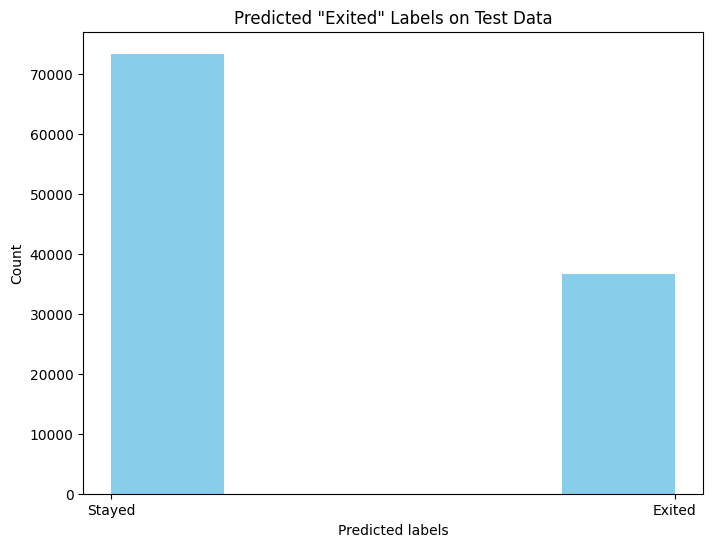

In [91]:
# Applying the model to the test dataset
X_new = test_df1
y_pred_new = classifier.predict(X_new)

# Plotting the predicted labels
plt.figure(figsize=(8, 6))
plt.hist(x=y_pred_new, bins = 5 , color= 'skyblue')
plt.xlabel('Predicted labels')
plt.ylabel('Count')
plt.title('Predicted "Exited" Labels on Test Data')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Exited'])
plt.show()

In [92]:
### Checking for length of test_ID and y_pred_new
print(len(test_id))
print(len(y_pred_new))

110023
110023


In [94]:
### Putting my model in a submission file
submission_df = pd.DataFrame({'id': test_id, 'Exited_pred': y_pred_new})
submission_df.to_csv('submission_knn.csv', index=False)

In [95]:
sub_df = pd.read_csv('submission_knn.csv')
sub_df.head(15)

,id,Exited_pred
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,1
5,165039,0
6,165040,0
7,165041,0
8,165042,1
9,165043,0
